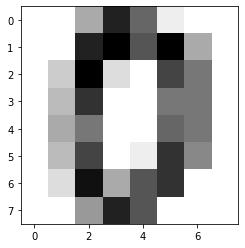

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_sample = len(digits.images)
data = digits.images.reshape((n_sample, -1))

In [ ]:
# 1. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


In [4]:
# 🎯 (1) Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  # 학습
y_pred_dt = dt_model.predict(X_test)  # 예측
dt_acc = accuracy_score(y_test, y_pred_dt)  # 정확도 계산
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("DT Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8528
DT Confusion Matrix:
 [[29  0  0  0  2  1  0  1  0  0]
 [ 0 22  1  1  2  0  0  0  1  1]
 [ 0  0 26  3  2  0  1  0  1  0]
 [ 0  0  0 30  0  0  1  0  3  0]
 [ 0  0  1  1 40  1  2  1  0  0]
 [ 0  0  2  1  1 42  1  0  0  0]
 [ 0  0  0  0  3  0 32  0  0  0]
 [ 0  0  1  1  1  1  0 30  0  0]
 [ 0  1  0  3  0  1  0  1 22  2]
 [ 0  0  0  1  1  0  1  2  1 34]]


In [5]:
# 🎯 (2) Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9722
RF Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  1  1  0  0  0 38]]


In [6]:
# 🎯 (3) SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9861
SVM Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [7]:
# 🎯 (4) Logistic Regression
lr_model = LogisticRegression(max_iter=10000)  # 반복 횟수 증가
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9750
LR Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


In [9]:
# 🎯 (5) KNN
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9889
KNN Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]


[1]


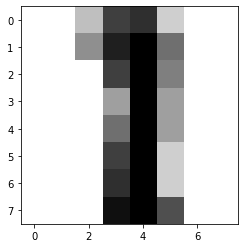

In [11]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred_knn = knn_model.predict([X_test[10]])
print(y_pred_knn)

[2]


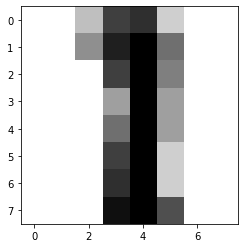

In [12]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred_dt = dt_model.predict([X_test[10]])
print(y_pred_dt)